In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Part 1

1. Convert the date column to datetime dtype.

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

2. Set the date column as the index.

In [4]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth

In [5]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


4. Impute any missing values

In [6]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [8]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [9]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2 

Q1: What month had the most precipitation between 2000 through 2010?

In [10]:
p = df['precipitation'].loc['2000':'2010'].copy()
p

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [11]:
most=p.idxmax()
most

Timestamp('2000-10-29 00:00:00')

In [12]:
p.loc['2000-10-29']

36.6

In [13]:
# customize major ticks 
major_loc = mdates.YearLocator()
major_fmt = mdates.DateFormatter("%Y")

## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

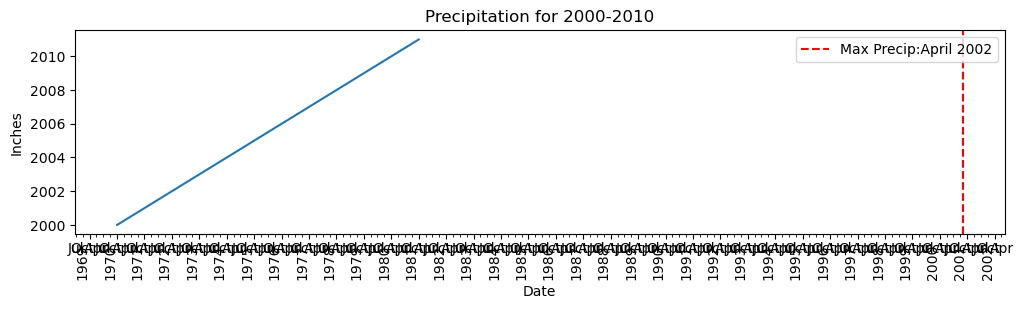

In [20]:
fig, ax = plt.subplots(figsize=(12,3))
p.plot(ax=ax)
ax.set(title='Precipitation for 2000-2010', ylabel='Inches', xlabel='Date')

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

ax.axvline(most, ls='--',color='red',label='Max Precip:April 2002')
ax.legend(loc='upper right');


Q2: Which year between 2000-2020 had the coolest average temperature?

In [15]:
tem = df['mean_temp'].loc['2000':'2020'].copy()
tem

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [16]:
tem2=tem.asfreq('Y')
tem2

date
2000-12-31     2.8
2001-12-31     1.0
2002-12-31     7.3
2003-12-31     3.3
2004-12-31    10.6
2005-12-31     5.4
2006-12-31     8.7
2007-12-31     6.7
2008-12-31    -0.8
2009-12-31     3.9
2010-12-31     5.9
2011-12-31     9.2
2012-12-31     8.6
2013-12-31     8.0
2014-12-31     2.2
2015-12-31     9.5
2016-12-31     4.6
2017-12-31    10.3
2018-12-31     9.4
2019-12-31     7.1
2020-12-31    -0.8
Freq: A-DEC, Name: mean_temp, dtype: float64

In [17]:
date_coolest = tem2.idxmin()
date_coolest

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [18]:
coolest = tem2.loc[date_coolest]
coolest

-0.8

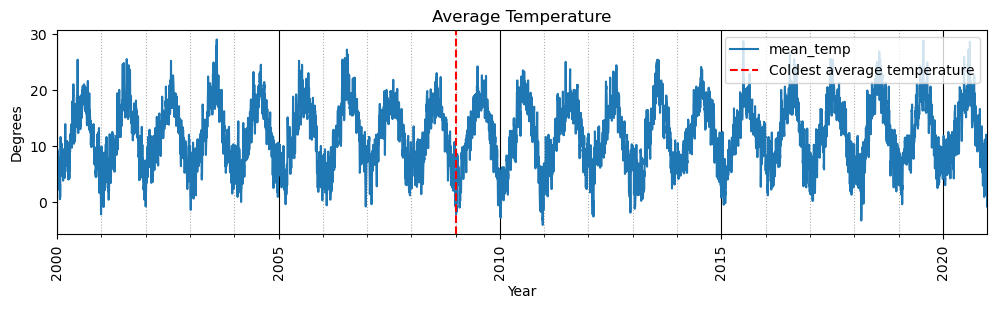

In [19]:
fig, ax = plt.subplots(figsize=(12,3))
tem.plot(ax=ax, title='Average Temperature', ylabel='Degrees', xlabel='Year')
ax.axvline(date_coolest, color='r', linestyle='--', label='Coldest average temperature')
#Have major xaxis ticks every 5 years.
loc_year = mdates.YearLocator(5)
ax.xaxis.set_major_locator(loc_year)

#Use 4-digit years for the labels
fmt_months = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(fmt_months)
#Have the major ticks' labels rotated 90 degrees.
fig.autofmt_xdate(rotation=90,ha='center')
#Have minor xaxis ticks every 1 year
minor_loc =  mdates.YearLocator(1)
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

#Do not label the minor ticks.

ax.legend(loc='upper right');